## Validating mRNA-protein (RPPA and MS) correlation results using linear regression

**Input:**  
- Source data for figures S1 and 1

**Output:**  
- Figure S3

### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

import graphing_utils
import customized_plot 

In [2]:
get_table_path = lambda fname: os.path.normpath('../tables/' + fname)
get_figure_path = lambda fname: os.path.normpath('../figures/' + fname)

file_sourceData_Figure1 = get_table_path('SourceDataForFigure1.csv')
file_sourceData_Figure2 = get_table_path('SourceDataForFigure2.csv')
file_sourceData_FigureS3 = get_table_path('SourceDataForFigureS3.csv')

### Load Data

In [3]:
mRNA_RPPA_correlation = pd.read_csv(file_sourceData_Figure1, index_col=0)
mRNA_RPPA_correlation[:2]

,BrCa,Ovarian,CoadRead,UCEC,KIRC,LGG,ValidationStatus
ACVRL1,0.142387,0.026260,0.119359,0.158536,-0.087107,0.175950,Use with Caution
ANXA7,0.335648,0.431283,0.269618,0.537909,0.479831,0.598215,Valid


In [4]:
mRNA_MS_correlation = pd.read_csv(file_sourceData_Figure2, index_col=0)
mRNA_MS_correlation[:2]

,BrCa (2016),Ovarian,CRC (2014),EC,ccRCC,GBM,ValidationStatus
ANXA7,0.431853,0.52711,0.151884,0.744248,0.466821,0.790204,Valid
AR,0.686791,NaN,NaN,0.742285,NaN,NaN,Valid


#### Performing linear regression to obtain R-squared

In [5]:
import statsmodels.api as sm

# regressing y on x 
def get_r2_after_model_fit(x, y):
#     x_subset, y_subset = cu.get_matched_index(x, y) 
    print("Common proteins: ", x.shape[0])
    est = sm.OLS(y, sm.add_constant(x.astype(float))).fit()
    return round(est.rsquared_adj *100, 2)

In [6]:
r2_antibody_validation_status_RPPA = {}
mRNA_RPPA_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)
# ccle_mRNA_protein_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)

r2_antibody_validation_status_RPPA['BrCa'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['BrCa'])['ValidationStatus'], 
                                                               y=mRNA_RPPA_correlation['BrCa'].dropna())
r2_antibody_validation_status_RPPA['Ovarian'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['Ovarian'])['ValidationStatus'], 
                                                                  y=mRNA_RPPA_correlation['Ovarian'].dropna())
r2_antibody_validation_status_RPPA['CoadRead'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['CoadRead'])['ValidationStatus'], 
                                                                   y=mRNA_RPPA_correlation['CoadRead'].dropna())
r2_antibody_validation_status_RPPA['UCEC'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['UCEC'])['ValidationStatus'], 
                                                               y=mRNA_RPPA_correlation['UCEC'].dropna())
r2_antibody_validation_status_RPPA['KIRC'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['KIRC'])['ValidationStatus'], 
                                                               y=mRNA_RPPA_correlation['KIRC'].dropna())
r2_antibody_validation_status_RPPA['LGG'] = get_r2_after_model_fit(x=mRNA_RPPA_correlation.dropna(subset=['LGG'])['ValidationStatus'], 
                                                              y=mRNA_RPPA_correlation['LGG'].dropna())

Common proteins:  106
Common proteins:  106
Common proteins:  106
Common proteins:  106
Common proteins:  106
Common proteins:  106


In [7]:
r2_antibody_validation_status_MS = {}
mRNA_MS_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)
# ccle_mRNA_protein_correlation['ValidationStatus'].replace({'Valid': 1, 'Use with Caution': 0}, inplace=True)

r2_antibody_validation_status_MS['BrCa (2016)'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['BrCa (2016)'])['ValidationStatus'], 
                                                               y=mRNA_MS_correlation['BrCa (2016)'].dropna())
r2_antibody_validation_status_MS['Ovarian'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['Ovarian'])['ValidationStatus'], 
                                                                  y=mRNA_MS_correlation['Ovarian'].dropna())
r2_antibody_validation_status_MS['CRC (2014)'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['CRC (2014)'])['ValidationStatus'], 
                                                                   y=mRNA_MS_correlation['CRC (2014)'].dropna())
r2_antibody_validation_status_MS['EC'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['EC'])['ValidationStatus'], 
                                                               y=mRNA_MS_correlation['EC'].dropna())
r2_antibody_validation_status_MS['ccRCC'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['ccRCC'])['ValidationStatus'], 
                                                               y=mRNA_MS_correlation['ccRCC'].dropna())
r2_antibody_validation_status_MS['GBM'] = get_r2_after_model_fit(x=mRNA_MS_correlation.dropna(subset=['GBM'])['ValidationStatus'], 
                                                              y=mRNA_MS_correlation['GBM'].dropna())

Common proteins:  87
Common proteins:  81
Common proteins:  51
Common proteins:  94
Common proteins:  79
Common proteins:  88


In [8]:
r2 = pd.concat([pd.DataFrame.from_dict(r2_antibody_validation_status_MS, 
                                       orient='index').rename(columns={0: 'mRNA-protein (MS) correlation'}), 
                pd.DataFrame.from_dict(r2_antibody_validation_status_RPPA, 
                                       orient='index').rename(columns={0: 'mRNA-protein (RPPA) correlation'})],
               axis=1).rename(index ={'BrCa (2016)' : 'Breast (2016, 2012)', 'BrCa': 'Breast (2016, 2012)', 
                                      'CRC (2014)': 'Colorectal (2014, 2012)', 'CoadRead': 'Colorectal (2014, 2012)', 
                                      'UCEC': 'Endometrial (2020, 2013)', 'EC': 'Endometrial (2020, 2013)', 
                                      'LGG':'Glioblastoma (2020) /\nGlioma (2015)', 'GBM': 'Glioblastoma (2020) /\nGlioma (2015)',
                                      'KIRC': 'Kidney (2019, 2013)', 'ccRCC': 'Kidney (2019, 2013)', 
                                      'Ovarian': 'Ovarian (2016, 2011)'})
r2 = r2.groupby(r2.index).mean()
r2

,mRNA-protein (MS) correlation,mRNA-protein (RPPA) correlation
"Breast (2016, 2012)",0.32,9.11
"Colorectal (2014, 2012)",-1.04,6.52
"Endometrial (2020, 2013)",5.46,5.90
Glioblastoma (2020) /\nGlioma (2015),-0.68,7.43
"Kidney (2019, 2013)",1.04,18.20
"Ovarian (2016, 2011)",-1.03,5.79


In [9]:
print("Mean of the CPTAC and TCGA studies: ")
r2.mean()

Mean of the CPTAC and TCGA studies: 


mRNA-protein (MS) correlation      0.678333
mRNA-protein (RPPA) correlation    8.825000
dtype: float64

In [10]:
r2_melted  = pd.melt(r2.reset_index().rename(columns={'index': 'Study'}), 
                     id_vars='Study', value_vars=['mRNA-protein (MS) correlation', 'mRNA-protein (RPPA) correlation'], 
                     var_name='Response variable in linear regression', value_name='R2')
r2_melted.to_csv(file_sourceData_FigureS3, index=False)
r2_melted

,Study,Response variable in linear regression,R2
0,"Breast (2016, 2012)",mRNA-protein (MS) correlation,0.32
1,"Colorectal (2014, 2012)",mRNA-protein (MS) correlation,-1.04
2,"Endometrial (2020, 2013)",mRNA-protein (MS) correlation,5.46
3,Glioblastoma (2020) /\nGlioma (2015),mRNA-protein (MS) correlation,-0.68
4,"Kidney (2019, 2013)",mRNA-protein (MS) correlation,1.04
5,"Ovarian (2016, 2011)",mRNA-protein (MS) correlation,-1.03
6,"Breast (2016, 2012)",mRNA-protein (RPPA) correlation,9.11
7,"Colorectal (2014, 2012)",mRNA-protein (RPPA) correlation,6.52
8,"Endometrial (2020, 2013)",mRNA-protein (RPPA) correlation,5.90
9,Glioblastoma (2020) /\nGlioma (2015),mRNA-protein (RPPA) correlation,7.43


In [11]:
palette = [graphing_utils.get_color(color) for color in ['denim-blue', 'dark-sky-blue']]
args = graphing_utils.additional_plot_parameters(xlab="R-squared (%)", ylab=None, palette = palette)

In [12]:
get_order = lambda df: df.groupby(by=['Study']).max().sort_values('R2').index.values

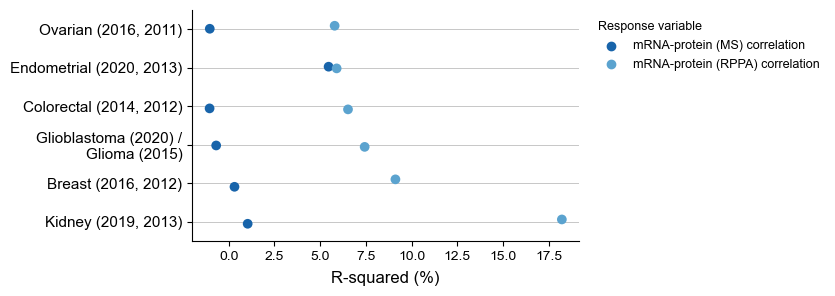

In [13]:
with plt.rc_context({'axes.linewidth': 0.8, 'axes.labelsize':12, 'axes.spines.left': True, 'xtick.labelsize':10, 
                     'ytick.labelsize':11}):
    figure, ax = plt.subplots(1, 1, figsize=(5, 3))
    sns.stripplot(x='R2', y='Study', data=r2_melted, ax=ax, hue='Response variable in linear regression', s=7, 
                  order=get_order(r2_melted),
                  palette= args.palette, )
    ax.legend(title='Response variable', 
              title_fontsize='medium', framealpha=1, 
              facecolor='white', bbox_to_anchor = (1.65, 1))._legend_box.align = "left"
    customized_plot.customise_plot(ax, args)
    plt.subplots_adjust(wspace=0.4, hspace=0.45)
#     figure.savefig(get_figure_path('FigureS3.svg'), bbox_inches='tight', dpi=300)

<div class="alert alert-block alert-success">
    mRNA-protein (RPPA) correlation is better explained by antibody validation status compared to mRNA-protein (MS) correlation. 
</div>